<a href="https://colab.research.google.com/github/GEOFFREY-MO/My-data/blob/main/presentation%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="table"> </a>
# cOMPUTATIONAL GROUP WORK
## Table  of  contents
> 1. [solving  the  ode  function](#ode)
> 2. [Image  converting  from rgb to Gray](#imgchange)
> 3.  [Image  compression](#imagecompression)
> 4. [Solving  the Mathematical model](#solvingmathematicalmodel)


<a id="imgchange"> </a>
## Turning the  image  into from rgb to gray.
- import the  necessary libraries .
> In this case we shall use  open_cv image processing  library.

> [Go up](#table)


In [ ]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import  cv2
import  matplotlib as  mpl
import  matplotlib.pyplot as  plt
from IPython.display import  display

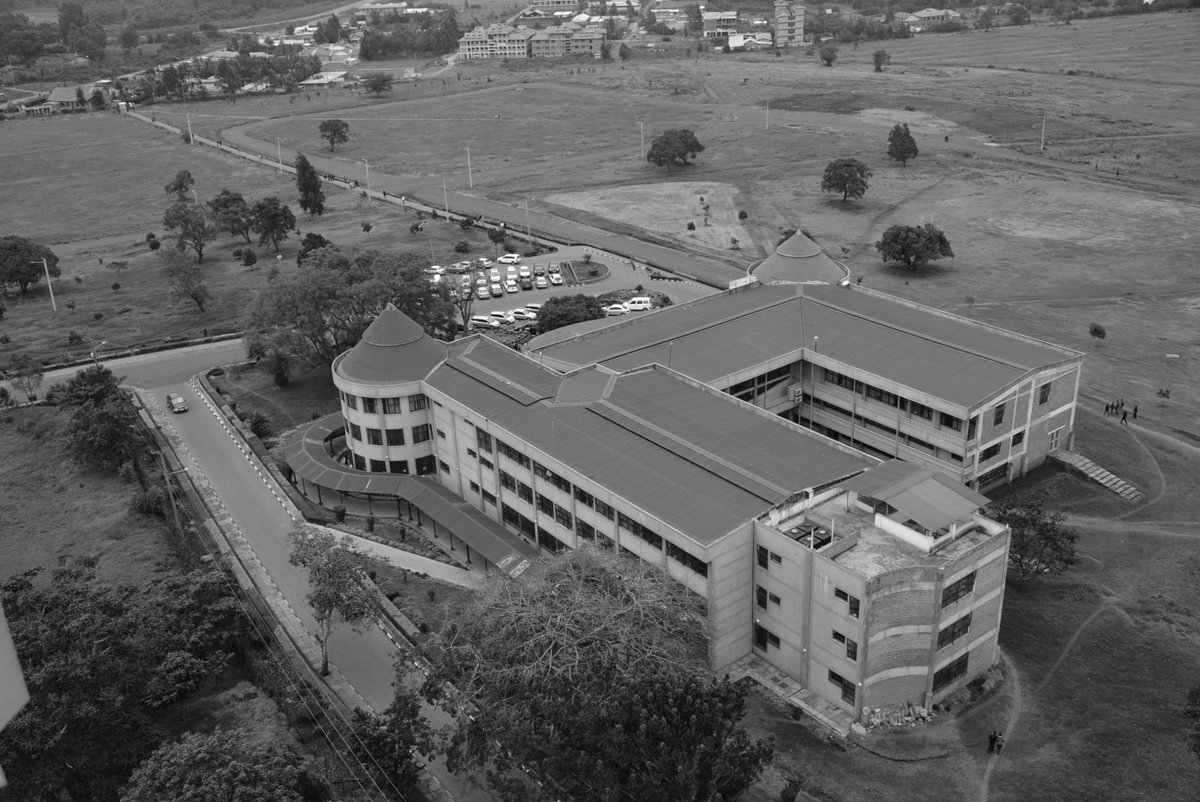

In [ ]:
img = cv2.imread("example.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#mpl.rcParams["figure.figsize"] = [10, 15]
#plt.imshow(img_gray)
display(Image.fromarray(img_gray))

<a id="imagecompression"> </a>
### Svd  image compression

> compressing  with values k =[5, 10, 25, 40]
-
> [Go up](#table)

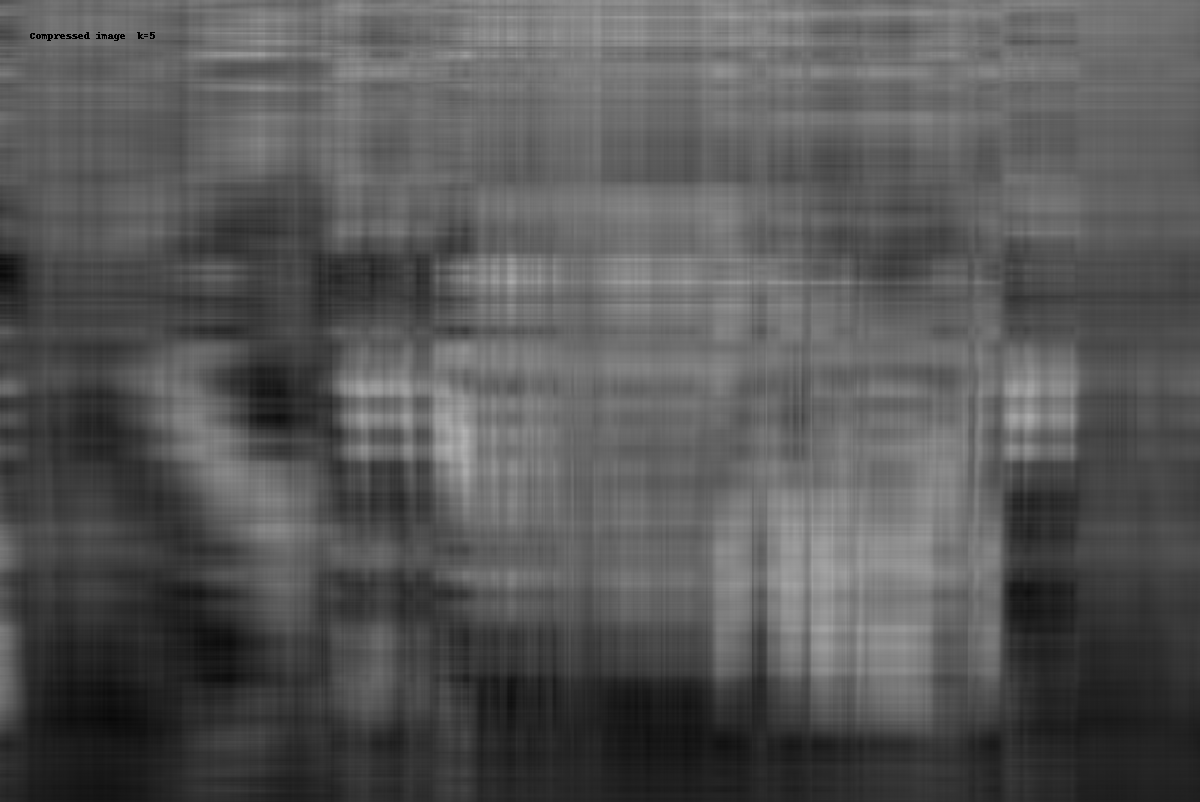

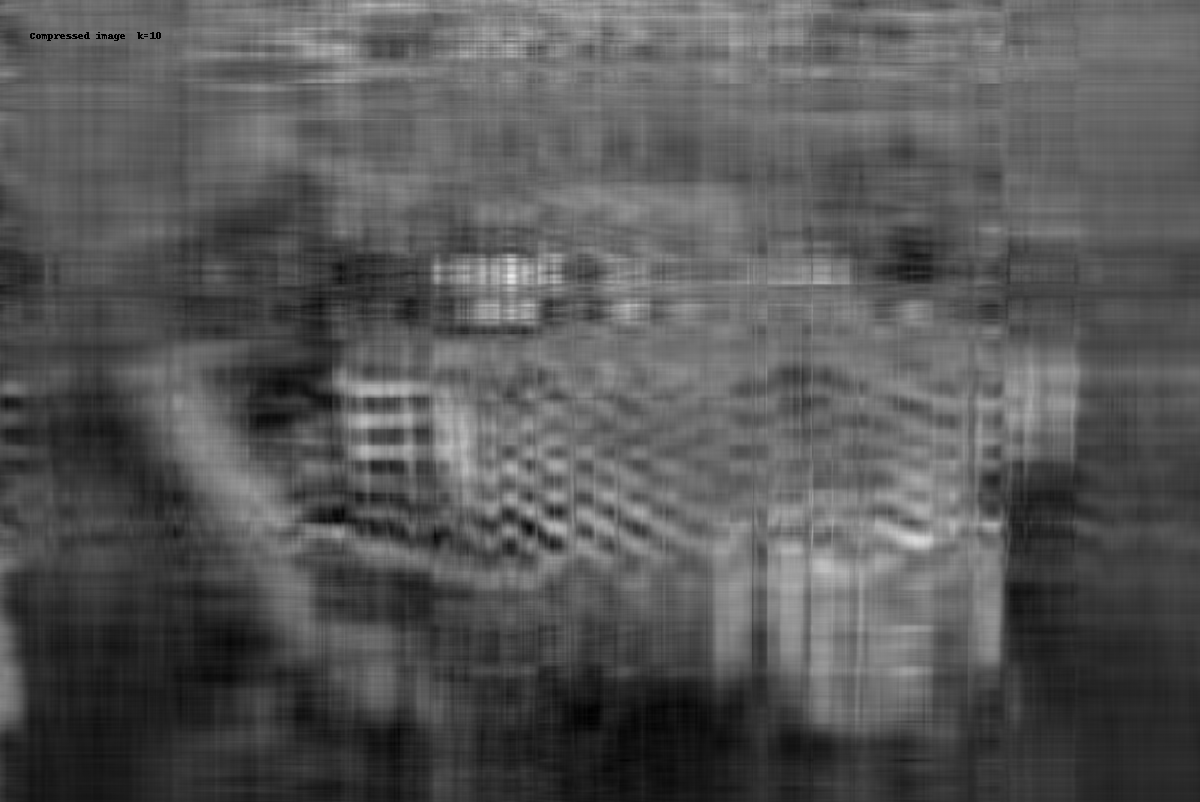

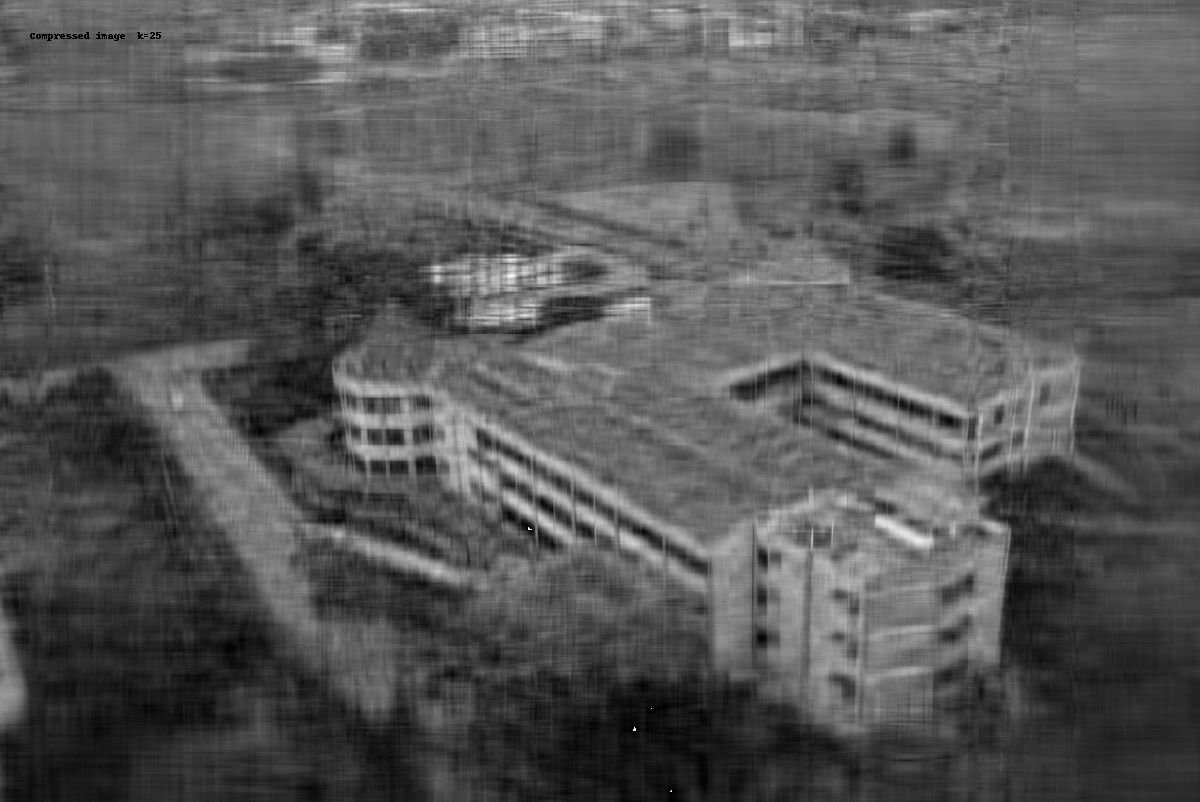

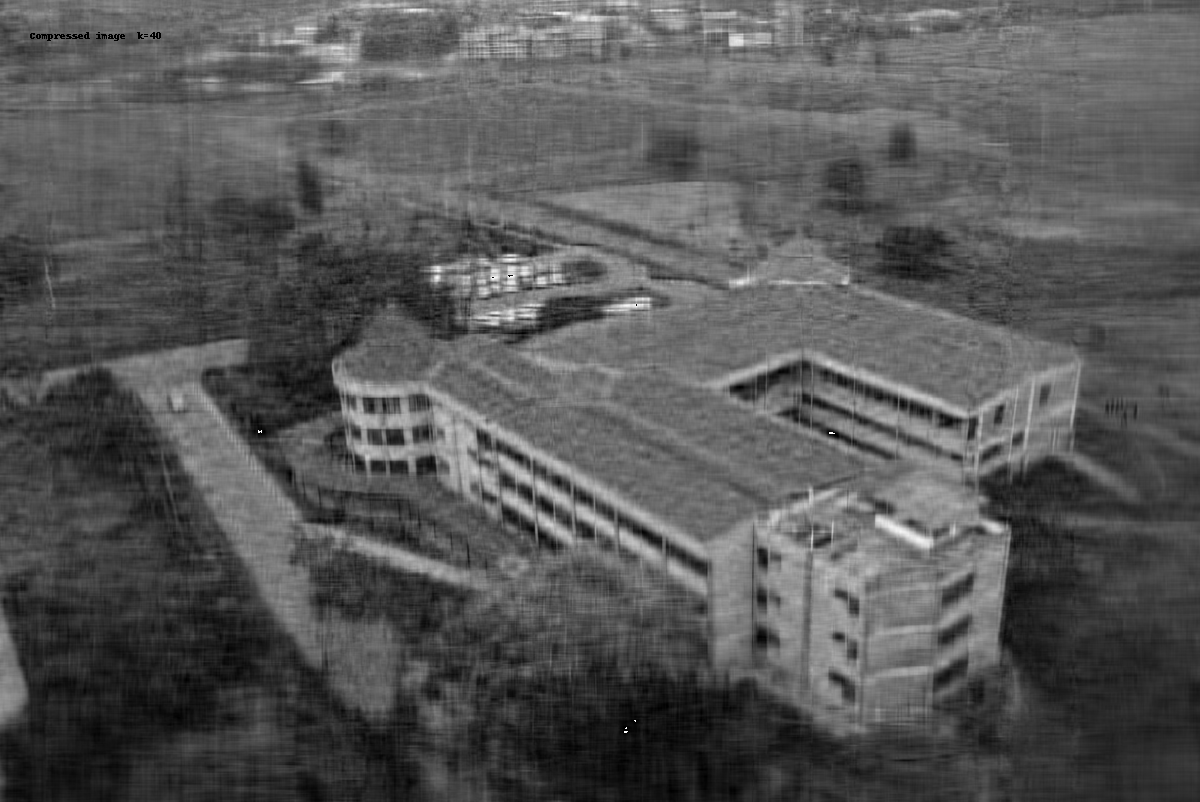

In [ ]:
U, S, V = np.linalg.svd(img[:,:,0], full_matrices=False)

k = [5,10,  25, 40]
for  i in k:
    generated = np.dot(U[:,:i], np.dot(np.diag(S[:i]), V[:i,:]))
    compressed_img = Image.fromarray(generated.astype(np.uint8))
    #title_font = ImageFont.truetype('playfair/playfair-font.ttf', 200)
    title_text = f"Compressed image  k={i}"
    image_editable = ImageDraw.Draw(compressed_img)
    image_editable.text((30,30), text=title_text)
    compressed_img.save(f"compressed_k{i}.jpg")#plt.imshow(compressed_img)
    display(compressed_img)

<a  id="ode" > </a>
## tutorial 2  Question 3
Solve  an ordinary  differential equation.
- Equation with variable  coefficients.
> - Example: $$ x^2 \frac {d^2y} {dx^2} - 5x \frac {dy} {dx} + 8y = 4ln(x) $$
- Solution  is  : $$ y = C_1 x^2 + C_2 x^4 +  \frac {ln(x)} {2} + \frac {3} {8} $$
##### Algorithm:
- [x] 1. Import the necessary libraries, including Sympy.

- [x] 2. Define the symbolic variables and functions that appear in the ODE. This can be done using Sympy's symbols and Function classes.

- [x] 3. Define the ODE using Sympy's Eq function. The ODE should be in the form of an equation where the left-hand side is the derivative of the dependent variable with respect to the independent variable, and the right-hand side is a function of both variables.

- [x] 4. Use Sympy's dsolve function to solve the ODE. This function takes the ODE as input and returns the general solution.
> [Go up](#table)

In [ ]:
import sympy as sym
#from IPython.display import  Latex

In [ ]:
x = Symbol("x")
y = Function("y")
eqn = Eq(x**2*diff(y(x), x,x)-5*x*diff(y(x), x)+8*y(x),4*ln(x))
eqn

Eq(x**2*Derivative(y(x), (x, 2)) - 5*x*Derivative(y(x), x) + 8*y(x), 4*log(x))

In [ ]:
ode_sys = dsolve(eqn)
ode_sys

Eq(y(x), C1*x**2 + C2*x**4 + log(x)/2 + 3/8)

<a  id ="solvingmathematicalmodel" > </a>
## Solving  a  mathematicsl model
- In this  question we  shall solve  the sysytem of  linear  equation.
- We shall find the rate  of each country by soving  the system of equation .
##### Mathematical model:
```Total charge in each month:
January: 15Cx1 + 10Bx1 + 6Sx1 + 5Gx1 = y1
February: 20Cx2 + 5Bx2 + 3Sx2 + 4Gx2 = y2
March: 10Cx3 + 2Bx3 + 5Sx3 + 5Gx3 = y3
April: 12Cx4 + 4Bx4 + 10Sx4 + Gx4 = y4
So we shall solve  the  value of  y1, y2, y3, y4 as a  sysytem of  equations.
```
##### Psudo code:

- [x] 1. Define the coefficients matrix A and the dependent variable vector y based on the mathematical model
- [x] 2. Use Scipy.linalg to solve the linear system Ax = y for x
- [x] 3. Print the solution vector x, which contains the call rates for each country.
> - [Go Up](#table)

In [ ]:
# import  the  necessary libraries
import  scipy
import  numpy as  np
import  pandas as pd
#Feeding the  data  in a  data frame
data = {"Canada":[15,20,10,12], "Brazil":[10,5,2,4], "Spain":[6,3,5,10],"Germany":[5,4,5,1],"Charges":[273,266,167,227]}
df = pd.DataFrame(data)
#viewing the  dataset  on the  notebook
df

,Canada,Brazil,Spain,Germany,Charges
0,15,10,6,5,273
1,20,5,3,4,266
2,10,2,5,5,167
3,12,4,10,1,227


In [ ]:
#slicing  and  converting  tha  data  frame into numpy arrays
vals   = np.array(df.iloc[:,[0,1,2,3]])
#printing the  numpy array of each column showing  each country.
vals

array([[15, 10,  6,  5],
       [20,  5,  3,  4],
       [10,  2,  5,  5],
       [12,  4, 10,  1]], dtype=int64)

In [ ]:
#Slicing Total charges  form the  data frame
solutions  = scipy.linalg.solve(vals, df.iloc[:,[4]])
#feeding  the  countries names   into a list
countries = ["Canada", "Brazil", "Spain", "Germany"]
# creating the  dataframe  for the  solutions of the countries  in each rate.
solns = pd.DataFrame(list(zip(countries, solutions)),columns=[["Countries", "Call rates"]])
solns

,Countries,Call rates
0,Canada,[10.0]
1,Brazil,[6.0]
2,Spain,[7.999999999999999]
3,Germany,[3.0000000000000036]
